# Support-Vector Networks
### By: Corinna Cortes and Vladimir Vapnik
### Cortes, C. & Vapnik, V. Support-vector networks. Mach Learn 20, 273–297 (1995). [https://doi.org/10.1007/BF00994018](https://doi.org/10.1007/BF00994018)

In [5]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from svn import SVM # Custom SVM

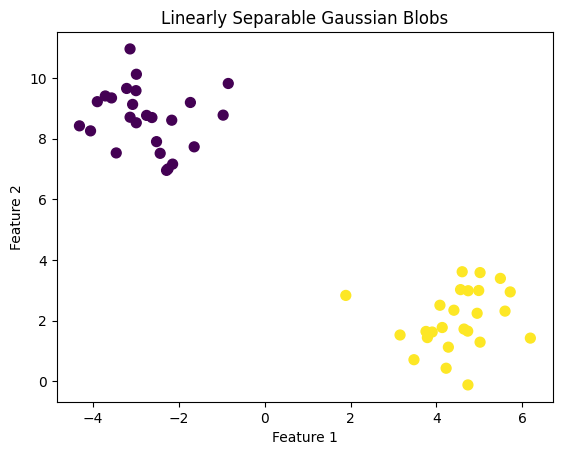

In [6]:
# Generate isotropic Gaussian blobs for binary classification
# This dataset is linearly separable, creating two separable classes in a 2-dimensional space
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=42)

# Plot the generated blobs
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Gaussian Blobs')
plt.show()

Weights: [ 0.52735146 -0.08786235], Bias: -0.2630000000000002


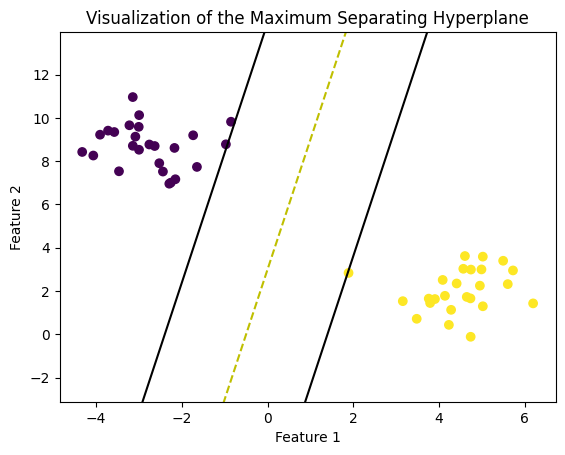

In [7]:
# Instantiate and fit the custom SVM model to the dataset
clf = SVM()
clf.fit(X, y)
# Get the learned weights and bias from the model
weights = clf.weights
bias = clf.bias
print(f"Weights: {weights}, Bias: {bias}")

# Define a function to visualize the maximum separating hyperplane with a linear kernel (custom SVM configuration)
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        # Calculate the value of the hyperplane at a given x with an optional offset
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    # Get the range of x values for plotting the hyperplane
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    # Calculate the corresponding y values for the main hyperplane and the margins
    x1_1 = get_hyperplane_value(x0_1, weights, bias, 0)
    x1_2 = get_hyperplane_value(x0_2, weights, bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, weights, bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, weights, bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, weights, bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, weights, bias, 1)

    # Plot the main hyperplane (yellow dashed line)
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    # Plot the margin lines (black solid lines)
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    # Set the limits for the y-axis
    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Visualization of the Maximum Separating Hyperplane')
    plt.show()

# Visualize the maximum separating hyperplane
visualize_svm()